# Tutorial document for RGB Hexagram (Kondo 2025)

## This Jupyter Notebook shows an example analysis of a tutorial reality experiment with a cloud-resolving model using RGB hexagrams. <br/>

The numerical experiments are based on the meteorological model:SCALE (Nishizawa et al. 2015; Sato et a. 2015, available in https://scale.riken.jp/) tutorial case with changing cloud microphysics scheme with 1-moment bulk (Tomita 2008) and 2-momnet bulk (Seiki and Nakajima 2014) and a modified output interval is 900 s. <br/> 
For more information on the SCALE tutorial, please see the "Chapter 3.2 Real atmosphere experiment" in the Users Guide (https://scale.riken.jp/archives/scale_users_guide_En.v5.5.4.pdf).

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm

# Create RGB Hexagram array data

The size of the RGB hexagram can be specified by changing the coefficient k (see Kondo 2025 for details). <br>
(k<=11 is recommended.)

In [2]:
from generate_rgb_hex import generate_rgb_hex

# input RGB hexagram size parameter
k = 11

# generate RGB hexagram array-> r_hex:Red data, g_hex:Green data, b_data:Blue data, num_hex:Area data
# r,g,b_hex array data between 0 to 1, num_hex data between 1 to 15
r_hex, g_hex, b_hex, num_hex = generate_rgb_hex(k)

grid size : 96
center pos: 24
RGB pos for Green:
R: 24, 85
G: 12, 24
B: 85, 12
CYM pos:
C: 24, 12
Y: 12, 85
M: 85, 24
----
basic RGB-W grid num: 11
one-cycle grid num  : 72
max-cycle grid num  : 138
changing ratio      : 21.25
min changing ratio  : 11.08695652173913
----
sample grid cycle
R->Y->G->C->B->M->...
rgb_hex shape: (96, 96)
----
output_filename-> r_file: rw_hex_test_d.csv , g_file: gw_hex_test_d.csv , b_file: bw_hex_test_d.csv n_file nw_hex_test_d.csv


# Plotting base RGB hexagram results

r_hex: Red, g_hex: Green, and b_hex: Blue normalized RGB value distribution are plotted. <br>
num_hex is the Areas of RGB hexagram

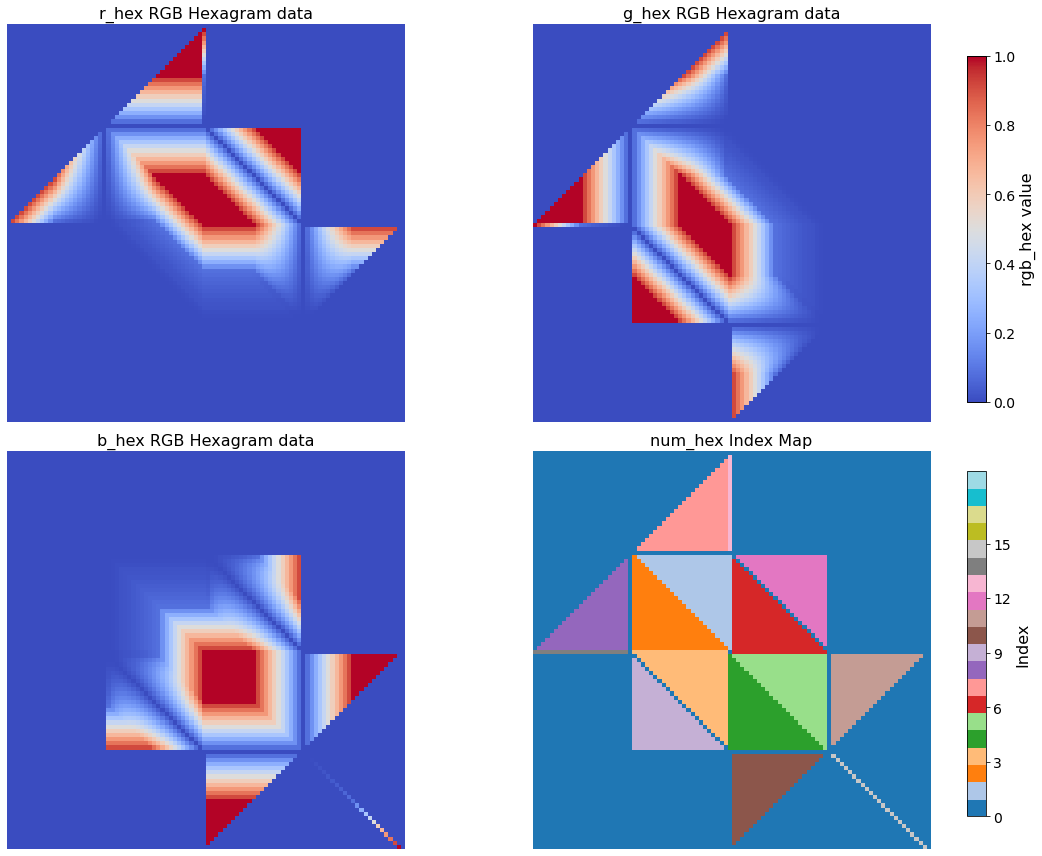

In [3]:
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1])  # 2行3列

# position of each plot
ax0 = fig.add_subplot(gs[0, 0])  # r_hex
ax1 = fig.add_subplot(gs[0, 1])  # g_hex
cax1 = fig.add_axes([0.82, 0.53, 0.015, 0.4]) # [left, bottom, width, height]

ax2 = fig.add_subplot(gs[1, 0])  # b_hex
ax3 = fig.add_subplot(gs[1, 1])  # num_hex
cax3 = fig.add_axes([0.82, 0.05, 0.015, 0.4])

# r_hex
im0 = ax0.imshow(r_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax0.set_title('r_hex RGB Hexagram data', fontsize=16)
ax0.axis('off')

# g_hex
im1 = ax1.imshow(g_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax1.set_title('g_hex RGB Hexagram data', fontsize=16)
ax1.axis('off')
fig.colorbar(im1, cax=cax1, label='g_hex value')
cb1 = fig.colorbar(im1, cax=cax1)
cb1.set_label('rgb_hex value', fontsize=16)
cb1.ax.tick_params(labelsize=14)

# b_hex
im2 = ax2.imshow(b_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax2.set_title('b_hex RGB Hexagram data', fontsize=16)
ax2.axis('off')

# num_hex
im3 = ax3.imshow(num_hex[:, :] * 256.0, vmin=0, vmax=19, cmap='tab20', origin='lower')
ax3.set_title('num_hex Index Map', fontsize=16)
ax3.axis('off')
cb3 = fig.colorbar(im3, cax=cax3)
cb3.set_label('Index', fontsize=16)
cb3.set_ticks(np.arange(0, 16, 3))
cb3.ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [4]:
print(r_hex.shape)
print(g_hex.shape)
print(b_hex.shape)

(96, 96)
(96, 96)
(96, 96)


# Plotting RGB hexagrams by RGB values

Generated RGB values are used for plotting color plots.

(96, 96)


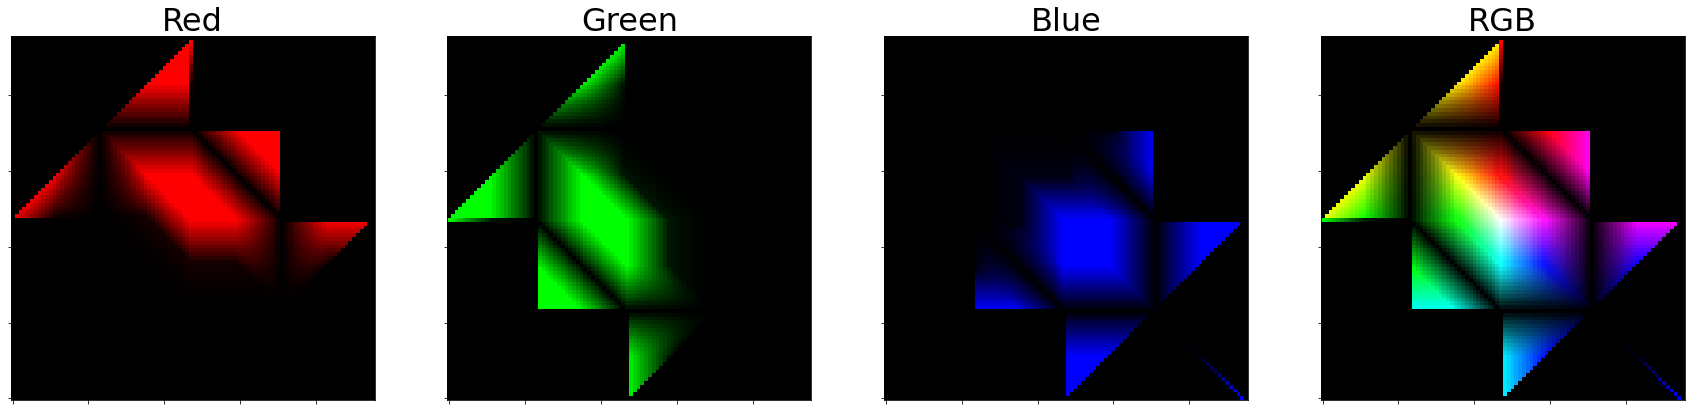

In [5]:
# Read CSV files
r_df = pd.read_csv('rw_hex_test_d.csv', header=None)
g_df = pd.read_csv('gw_hex_test_d.csv', header=None)
b_df = pd.read_csv('bw_hex_test_d.csv', header=None)
n_df = pd.read_csv('nw_hex_test_d.csv', header=None)

# Replace negative values with zero
n_df[n_df < 0] = 0
n_df[n_df > 100] = 0

r_df = r_df.iloc[:, :]
g_df = g_df.iloc[:, :]
b_df = b_df.iloc[:, :]
n_df = n_df.iloc[:, :]

# Normalize RGB values to the range 0~1
r = np.clip(r_df.values, 0, 1)
g = np.clip(g_df.values, 0, 1)
b = np.clip(b_df.values, 0, 1)

# Combine RGB values into a single array
rgb = np.dstack((r, g, b))

# Convert to 1 column
r_series = r_df.stack().reset_index(drop=True)
g_series = g_df.stack().reset_index(drop=True)
b_series = b_df.stack().reset_index(drop=True)

print(r_df.shape)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(30, 15))
fsiz=32

# Colormap Definition
n_bins = 256  # Colormap fineness
r_colors = [(0, 0, 0), (1, 0, 0)]  # RGB values in the range 0-1
r_cmap_name = 'black_to_red'

g_colors = [(0, 0, 0), (0, 1, 0)]
g_cmap_name = 'black_to_green'

b_colors = [(0, 0, 0), (0, 0, 1)]
b_cmap_name = 'black_to_blue'

# Create color maps
cmr = LinearSegmentedColormap.from_list(r_cmap_name, r_colors, N=n_bins)
cmg = LinearSegmentedColormap.from_list(g_cmap_name, g_colors, N=n_bins)
cmb = LinearSegmentedColormap.from_list(b_cmap_name, b_colors, N=n_bins)

# plotting each data
im1 = axs[0].imshow(r, cmap=cmr, origin='lower')
axs[0].set_title('Red', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im2 = axs[1].imshow(g, cmap=cmg, origin='lower')
axs[1].set_title('Green', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im3 = axs[2].imshow(b, cmap=cmb, origin='lower')
axs[2].set_title('Blue', fontsize=fsiz)
axs[2].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im4 = axs[3].imshow(rgb, interpolation='nearest', origin='lower')
axs[3].set_title('RGB', fontsize=fsiz)
axs[3].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.show()

# Plotting an RGB hexagram using the sample 3D data

**This tutorial illustrates the analysis of simulation results from a cloud-resolving model using the RGB hexagram generated above.**  </br>
**In particular, the numerical experiment demonstrates how the RGB hexagram can be applied to analyze the impact of varying cloud microphysics schemes within the model setup.**

## Read results of simulation using a cloud-resolving model.
→For more information on the SCALE tutorial, please see the **"Chapter 3.2 Real atmosphere experiment"** in the Users Guide (https://scale.riken.jp/archives/scale_users_guide_En.v5.5.4.pdf).

* Read the results using a 1-momnet bulk scheme (Tomita 2008: T08)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset


# 1-moment bulk scheme result (Tomita 2008:T08)
# Open NetCDF file (read-only)
ncfile = Dataset('../sample_simulation_data/merged-z_t08_history_d01.pe000000.nc', mode='r')

print(ncfile.variables.keys())
print(ncfile.variables['DENS'])

# Read variables across all dimensions
dens_t = ncfile.variables['DENS'][:,:,:,:] 
qhyd_t = ncfile.variables['QHYD'][:,:,:,:]
qr_t = ncfile.variables['QR'][:,:,:,:]
qc_t = ncfile.variables['QC'][:,:,:,:]
qg_t = ncfile.variables['QG'][:,:,:,:]
qs_t = ncfile.variables['QS'][:,:,:,:]
qi_t = ncfile.variables['QI'][:,:,:,:]
t_t  = ncfile.variables['T'][:,:,:,:]
ts_t = ncfile.variables['SFC_TEMP'][:,:,:]

lat = ncfile.variables['lat'][:,:]   # shape: (y, x)
lon = ncfile.variables['lon'][:,:]   # shape: (y, x)
zz = ncfile.variables['z'][:]   # shape: (z)
time_val = ncfile.variables['time'][:]  # shape: (t)

# Get Fill Value
fill_value = ncfile.variables['DENS']._FillValue

# Close File
ncfile.close()

odict_keys(['z', 'z_bnds', 'zh', 'zh_bnds', 'oz', 'oz_bnds', 'ozh', 'ozh_bnds', 'lz', 'lz_bnds', 'lzh', 'lzh_bnds', 'uz', 'uz_bnds', 'uzh', 'uzh_bnds', 'x', 'x_bnds', 'xh', 'xh_bnds', 'y', 'y_bnds', 'yh', 'yh_bnds', 'CZ', 'FZ', 'CDZ', 'FDZ', 'CBFZ', 'FBFZ', 'OCZ', 'OFZ', 'OCDZ', 'LCZ', 'LFZ', 'LCDZ', 'UCZ', 'UFZ', 'UCDZ', 'CX', 'CY', 'FX', 'FY', 'CDX', 'CDY', 'FDX', 'FDY', 'CBFX', 'CBFY', 'FBFX', 'FBFY', 'CXG', 'CYG', 'FXG', 'FYG', 'CDXG', 'CDYG', 'FDXG', 'FDYG', 'CBFXG', 'CBFYG', 'FBFXG', 'FBFYG', 'height', 'height_xyw', 'height_uyz', 'height_xvz', 'height_uvz', 'height_uyw', 'height_xvw', 'height_uvw', 'lon', 'lon_uy', 'lon_xv', 'lon_uv', 'lat', 'lat_uy', 'lat_xv', 'lat_uv', 'cell_area', 'cell_area_uy', 'cell_area_xv', 'cell_area_uyz_x', 'cell_area_xvz_y', 'cell_area_uyw_x', 'cell_area_xvw_y', 'cell_area_xyz_x', 'cell_area_uvz_y', 'cell_area_uvz_x', 'cell_area_xyz_y', 'cell_volume', 'cell_volume_xyw', 'cell_volume_uyz', 'cell_volume_xvz', 'cell_volume_xyo', 'cell_volume_xyl', 'cell_v

* Read the results using a 2-momnet bulk scheme (Seiki and Nakajima 2014: SN14)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

# 2-moment bulk scheme result
# Open NetCDF file (read-only)
ncfile = Dataset('../sample_simulation_data/merged-z_sn14_history_d01.pe000000.nc', mode='r')

print(ncfile.variables.keys())
print(ncfile.variables['DENS'])

# Read variables across all dimensions
dens_s = ncfile.variables['DENS'][:,:,:,:] 
qhyd_s = ncfile.variables['QHYD'][:,:,:,:]
qr_s = ncfile.variables['QR'][:,:,:,:]
qc_s = ncfile.variables['QC'][:,:,:,:]
qg_s = ncfile.variables['QG'][:,:,:,:]
qs_s = ncfile.variables['QS'][:,:,:,:]
qi_s = ncfile.variables['QI'][:,:,:,:]
t_s  = ncfile.variables['T'][:,:,:,:]
ts_s = ncfile.variables['SFC_TEMP'][:,:,:]

lat = ncfile.variables['lat'][:,:]   # shape: (y, x)
lon = ncfile.variables['lon'][:,:]   # shape: (y, x)
zz = ncfile.variables['z'][:]   # shape: (z)
time_val = ncfile.variables['time'][:]  # shape: (t)

# Get Fill Value
fill_value = ncfile.variables['DENS']._FillValue

# Close File
ncfile.close()

odict_keys(['z', 'z_bnds', 'zh', 'zh_bnds', 'oz', 'oz_bnds', 'ozh', 'ozh_bnds', 'lz', 'lz_bnds', 'lzh', 'lzh_bnds', 'uz', 'uz_bnds', 'uzh', 'uzh_bnds', 'x', 'x_bnds', 'xh', 'xh_bnds', 'y', 'y_bnds', 'yh', 'yh_bnds', 'CZ', 'FZ', 'CDZ', 'FDZ', 'CBFZ', 'FBFZ', 'OCZ', 'OFZ', 'OCDZ', 'LCZ', 'LFZ', 'LCDZ', 'UCZ', 'UFZ', 'UCDZ', 'CX', 'CY', 'FX', 'FY', 'CDX', 'CDY', 'FDX', 'FDY', 'CBFX', 'CBFY', 'FBFX', 'FBFY', 'CXG', 'CYG', 'FXG', 'FYG', 'CDXG', 'CDYG', 'FDXG', 'FDYG', 'CBFXG', 'CBFYG', 'FBFXG', 'FBFYG', 'height', 'height_xyw', 'height_uyz', 'height_xvz', 'height_uvz', 'height_uyw', 'height_xvw', 'height_uvw', 'lon', 'lon_uy', 'lon_xv', 'lon_uv', 'lat', 'lat_uy', 'lat_xv', 'lat_uv', 'cell_area', 'cell_area_uy', 'cell_area_xv', 'cell_area_uyz_x', 'cell_area_xvz_y', 'cell_area_uyw_x', 'cell_area_xvw_y', 'cell_area_xyz_x', 'cell_area_uvz_y', 'cell_area_uvz_x', 'cell_area_xyz_y', 'cell_volume', 'cell_volume_xyw', 'cell_volume_uyz', 'cell_volume_xvz', 'cell_volume_xyo', 'cell_volume_xyl', 'cell_v

In [8]:
print(zz.shape)

(36,)


# Plotting surface temperature to comfirm the results

  shading=shading)


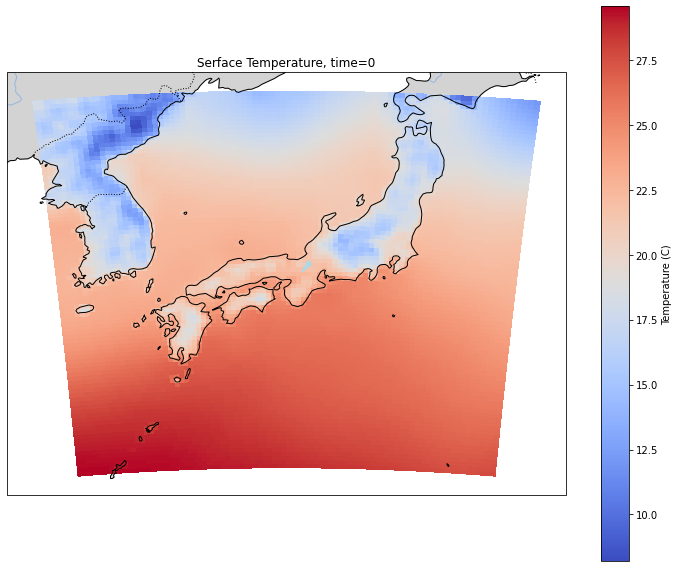

In [9]:
plt.figure(figsize=(10, 8))

# Map projection method (the data with LCC and latitude/longitude)
ax = plt.axes(projection=ccrs.PlateCarree())
cf = ax.pcolormesh(lon, lat, ts_t[0,:,:]-273.15, cmap='coolwarm', shading='auto')

# Addition of map elements
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Color Bar and Title
plt.colorbar(cf, label='Temperature (C)')
plt.title('Serface Temperature, time=0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


# Histogram analysis for investigating the value ranges of the three variables (liquid water, graupel, and ice) in the RGB hexagram

## The value range of T08

Maximum value of CL: 1.4811851978302002
Minimum value of CL: 0.0
----
Maximum value of CG: 0.8938866853713989
Minimum value of CG: 0.0
----
Maximum value of CI: 0.1954497992992401
Minimum value of CI: 0.0


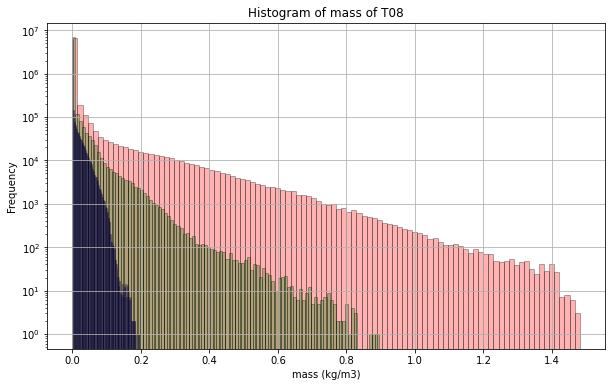

In [10]:
# Mask elements containing missing values
valid_mask = (dens_t != fill_value) & (qr_t != fill_value) & (qc_t != fill_value) & (qg_t != fill_value) & (qs_t != fill_value) & (qi_t != fill_value)

# Remove missing values and make it 1-dimensional
dens_t_clean = dens_t[valid_mask].flatten()
qr_t_clean = qr_t[valid_mask].flatten()
qc_t_clean = qc_t[valid_mask].flatten()
qg_t_clean = qg_t[valid_mask].flatten()
qs_t_clean = qs_t[valid_mask].flatten()
qi_t_clean = qi_t[valid_mask].flatten()

# Calculate masses
CR_t = dens_t_clean * qr_t_clean * 1000.0
CC_t = dens_t_clean * qc_t_clean * 1000.0
CG_t = dens_t_clean * qg_t_clean * 1000.0
CS_t = dens_t_clean * qs_t_clean * 1000.0
CI_t = dens_t_clean * qi_t_clean * 1000.0
CL_t = dens_t_clean * (qr_t_clean + qc_t_clean) * 1000.0
CI_t = dens_t_clean * (qi_t_clean + qs_t_clean) * 1000.0

# Show maximum and minimum values
print(f"Maximum value of CL: {np.max(CL_t)}")
print(f"Minimum value of CL: {np.min(CL_t)}")
print('----')
print(f"Maximum value of CG: {np.max(CG_t)}")
print(f"Minimum value of CG: {np.min(CG_t)}")
print('----')
print(f"Maximum value of CI: {np.max(CI_t)}")
print(f"Minimum value of CI: {np.min(CI_t)}")

# Plotting Histograms
plt.figure(figsize=(10, 6))
plt.hist(CL_t, bins=100, color='red', edgecolor='black', alpha =0.3)
plt.hist(CG_t, bins=100, color='green', edgecolor='black', alpha =0.3)
plt.hist(CI_t, bins=100, color='blue', edgecolor='black', alpha =0.3)
plt.yscale('log')
plt.title('Histogram of mass of T08')
plt.xlabel('mass (kg/m3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## The value range of SN14

Maximum value of CL: 1.6037003993988037
Minimum value of CL: 0.0
----
Maximum value of CG: 0.7682886719703674
Minimum value of CG: 0.0
----
Maximum value of CI: 0.5827928185462952
Minimum value of CI: 0.0


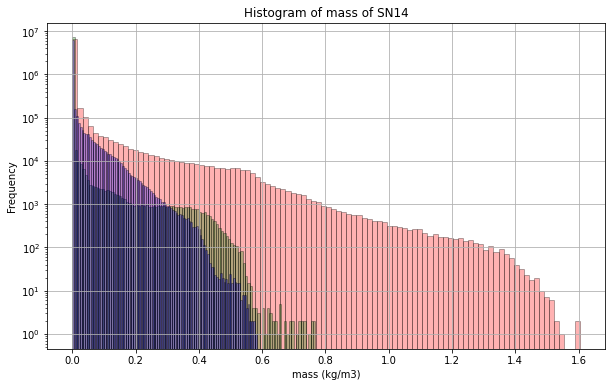

In [11]:
# Mask elements containing missing values
valid_mask = (dens_s != fill_value) & (qr_s != fill_value) & (qc_s != fill_value) & (qg_s != fill_value) & (qs_s != fill_value) & (qi_s != fill_value)

# Remove missing values and make it 1-dimensional
dens_s_clean = dens_s[valid_mask].flatten()
qr_s_clean = qr_s[valid_mask].flatten()
qc_s_clean = qc_s[valid_mask].flatten()
qg_s_clean = qg_s[valid_mask].flatten()
qs_s_clean = qs_s[valid_mask].flatten()
qi_s_clean = qi_s[valid_mask].flatten()

# Calculate masses
CR_s = dens_s_clean * qr_s_clean * 1000.0
CC_s = dens_s_clean * qc_s_clean * 1000.0
CG_s = dens_s_clean * qg_s_clean * 1000.0
CS_s = dens_s_clean * qs_s_clean * 1000.0
CI_s = dens_s_clean * qi_s_clean * 1000.0
CL_s = dens_s_clean * (qr_s_clean + qc_s_clean) * 1000.0
CI_s = dens_s_clean * (qi_s_clean + qs_s_clean) * 1000.0

# Show maximum and minimum values
print(f"Maximum value of CL: {np.max(CL_s)}")
print(f"Minimum value of CL: {np.min(CL_s)}")
print('----')
print(f"Maximum value of CG: {np.max(CG_s)}")
print(f"Minimum value of CG: {np.min(CG_s)}")
print('----')
print(f"Maximum value of CI: {np.max(CI_s)}")
print(f"Minimum value of CI: {np.min(CI_s)}")

# Plotting Histograms
plt.figure(figsize=(10, 6))
plt.hist(CL_s, bins=100, color='red', edgecolor='black', alpha =0.3)
plt.hist(CG_s, bins=100, color='green', edgecolor='black', alpha =0.3)
plt.hist(CI_s, bins=100, color='blue', edgecolor='black', alpha =0.3)
plt.yscale('log')
plt.title('Histogram of mass of SN14')
plt.xlabel('mass (kg/m3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Normalization based on the value ranges of simulation results

In [12]:
from netCDF4 import Dataset
import numpy as np

# Prepare array for normalization
cl_t_normalized = np.full_like(dens_t, fill_value, dtype=float)
cg_t_normalized = np.full_like(dens_t, fill_value, dtype=float)
ci_t_normalized = np.full_like(dens_t, fill_value, dtype=float)

# Normalization (divide by maximum value of SN14)
cl_t_normalized[valid_mask] = (dens_t[valid_mask] * (qr_t[valid_mask]+qc_t[valid_mask]) * 1000.0 ) / (np.max(CL_s))
cg_t_normalized[valid_mask] = (dens_t[valid_mask] * (qg_t[valid_mask]) * 1000.0 ) / (np.max(CG_s))
ci_t_normalized[valid_mask] = (dens_t[valid_mask] * (qs_t[valid_mask]+qi_t[valid_mask]) * 1000.0 ) / (np.max(CI_s))

# Confirmation
print(f"Maximum value of CL_t after normalization (including exclusions): {np.max(cl_t_normalized[cl_t_normalized != fill_value])}")
print(f"Maximum value of CG_t after normalization (including exclusions): {np.max(cg_t_normalized[cg_t_normalized != fill_value])}")
print(f"Maximum value of CI_t after normalization (including exclusions): {np.max(ci_t_normalized[ci_t_normalized != fill_value])}")

rgb_t = np.stack([cl_t_normalized,cg_t_normalized,ci_t_normalized], axis=-1)

print(cl_t_normalized.shape)

Maximum value of CL_t after normalization (including exclusions): 0.9236046671867371
Maximum value of CG_t after normalization (including exclusions): 1.1634776592254639
Maximum value of CI_t after normalization (including exclusions): 0.3353675603866577
(25, 36, 90, 90)


In [13]:
from netCDF4 import Dataset
import numpy as np

# Prepare array for normalization
cl_s_normalized = np.full_like(dens_s, fill_value, dtype=float)  # Default value is fill_value
cg_s_normalized = np.full_like(dens_s, fill_value, dtype=float)
ci_s_normalized = np.full_like(dens_s, fill_value, dtype=float)

# Normalization (divide by maximum value of SN14)
cl_s_normalized[valid_mask] = (dens_s[valid_mask] * (qr_s[valid_mask]+qc_s[valid_mask]) * 1000.0 ) / (np.max(CL_s))
cg_s_normalized[valid_mask] = (dens_s[valid_mask] * (qg_s[valid_mask]) * 1000.0 ) / (np.max(CG_s))
ci_s_normalized[valid_mask] = (dens_s[valid_mask] * (qs_s[valid_mask]+qi_s[valid_mask]) * 1000.0 ) / (np.max(CI_s))

# Confirmation
print(f"Maximum value of CL_s after normalization (including exclusions): {np.max(cl_s_normalized[cl_t_normalized != fill_value])}")
print(f"Maximum value of CG_s after normalization (including exclusions): {np.max(cg_s_normalized[cg_t_normalized != fill_value])}")
print(f"Maximum value of CI_s after normalization (including exclusions): {np.max(ci_s_normalized[ci_t_normalized != fill_value])}")

rgb_s = np.stack([cl_s_normalized,cg_s_normalized,ci_s_normalized], axis=-1)

print(cl_s_normalized.shape)

Maximum value of CL_s after normalization (including exclusions): 1.0
Maximum value of CG_s after normalization (including exclusions): 1.0
Maximum value of CI_s after normalization (including exclusions): 1.0
(25, 36, 90, 90)


## Distribution of total mass on RGB hexagram resulting from normalization

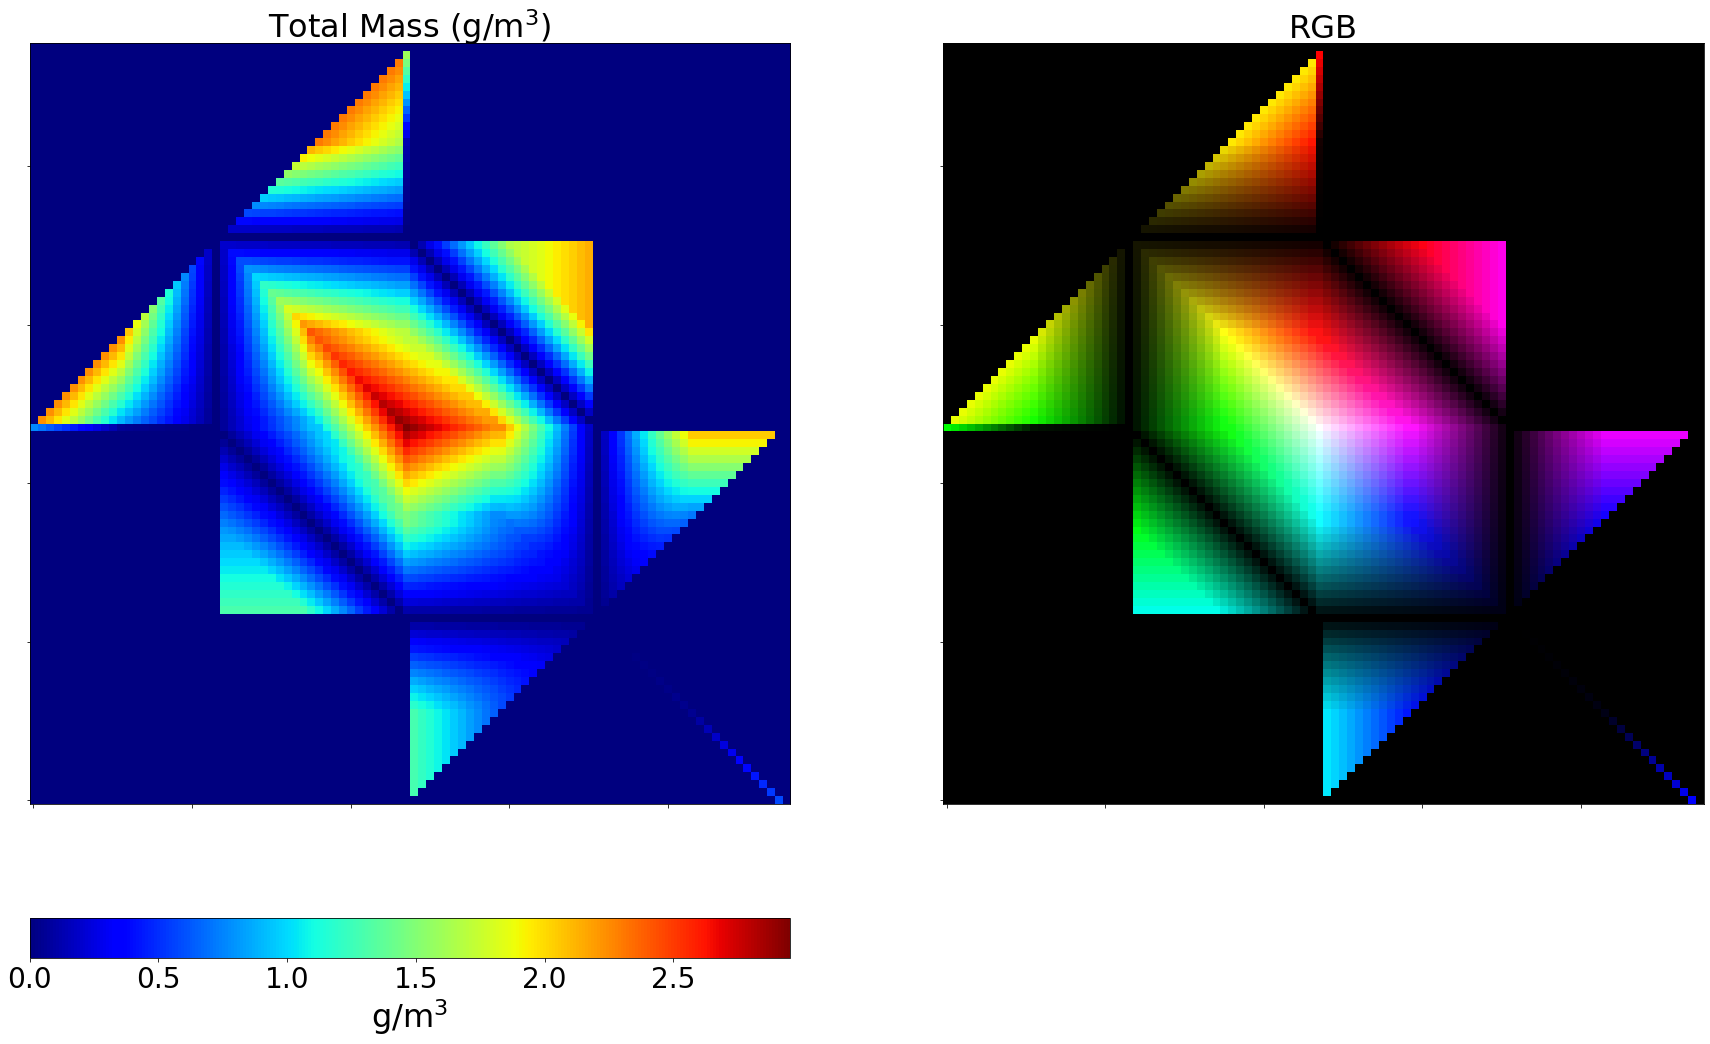

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fsiz = 32

# Figure and grid preparation
fig = plt.figure(figsize=(30, 18))
gs = gridspec.GridSpec(2, 2, height_ratios=[20, 1], hspace=0.3)

# Left figure
ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.imshow(r*np.max(CL_s) + g*np.max(CG_s) + b*np.max(CI_s), cmap='jet', origin='lower')
ax1.set_title(f'Total Mass (g/m$^3$)', fontsize=fsiz)
ax1.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Right figure
ax2 = fig.add_subplot(gs[0, 1])
im2 = ax2.imshow(rgb, interpolation='nearest', origin='lower')
ax2.set_title('RGB', fontsize=fsiz)
ax2.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Colorbar for left figure
cax = fig.add_subplot(gs[1, 0])
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal')
cbar.set_label('g/m$^3$', fontsize=fsiz)  # 単位のラベルを追加
cbar.ax.tick_params(labelsize=fsiz - 4)
box = cax.get_position()
cax.set_position([box.x0, box.y0 + 0.03, box.width, box.height])  # 下から0.03上にシフト

plt.tight_layout()

### Searching for longitude for vertical cross-sectional analysis

In [13]:
# Determine the x index closest to longitude 138°E (extracted by the middle line of y in the direction of latitude)
target_lon = 139.0
mid_y = lat.shape[0] // 2
abs_diff = np.abs(lon[mid_y, :] - target_lon)
x_idx = abs_diff.argmin()
print(f"Closest longitude: {lon[mid_y, x_idx]:.2f}°, x index: {x_idx}")

Closest longitude: 139.06°, x index: 62


# Mixed phase characteristics at a certain altitude using RGB values (red: liquid water, green: graupel, blue: ice)

## Horizontal analysis

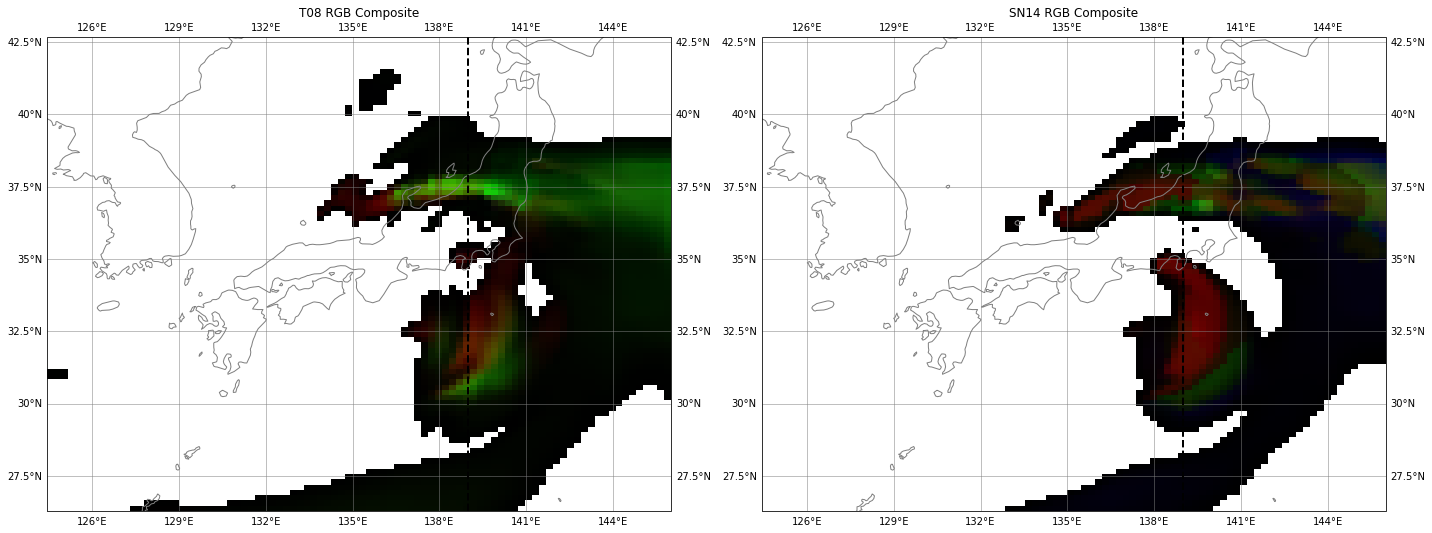

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# time and z-axis parameter
t_val = 20
z_val = 16

# Copy and process RGB images (pixels < 1(/256) are white)
def apply_rgb_mask(rgb_array):
    rgb = rgb_array.copy()
    mask = rgb.sum(axis=2) < (1/256)
    rgb[mask] = [1.0, 1.0, 1.0]  # white
    return rgb

# Value mask applied
rgb_t_masked = apply_rgb_mask(rgb_t[t_val, z_val, :, :, :])
rgb_s_masked = apply_rgb_mask(rgb_s[t_val, z_val, :, :, :])

# Map subplot (two side by side)
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- left：rgb of T08 ----------
axs[0].imshow(
    rgb_t_masked, origin='lower',
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    transform=ccrs.PlateCarree()
)
axs[0].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray')
axs[0].gridlines(draw_labels=True, color='gray', linewidth=0.5)
axs[0].set_title("T08 RGB Composite")

# ---------- Right：rgb of SN14 ----------
axs[1].imshow(
    rgb_s_masked, origin='lower',
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    transform=ccrs.PlateCarree()
)
axs[1].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray')
axs[1].gridlines(draw_labels=True, color='gray', linewidth=0.5)
axs[1].set_title("SN14 RGB Composite")

for ax in axs:
    ax.plot(
        [139, 139],                         
        [lat.min(), lat.max()],             
        linestyle='--', color='black', linewidth=2,
        transform=ccrs.PlateCarree()        
    )

# Adjusting the Layout
plt.tight_layout()
plt.show()


## Vertical analysis

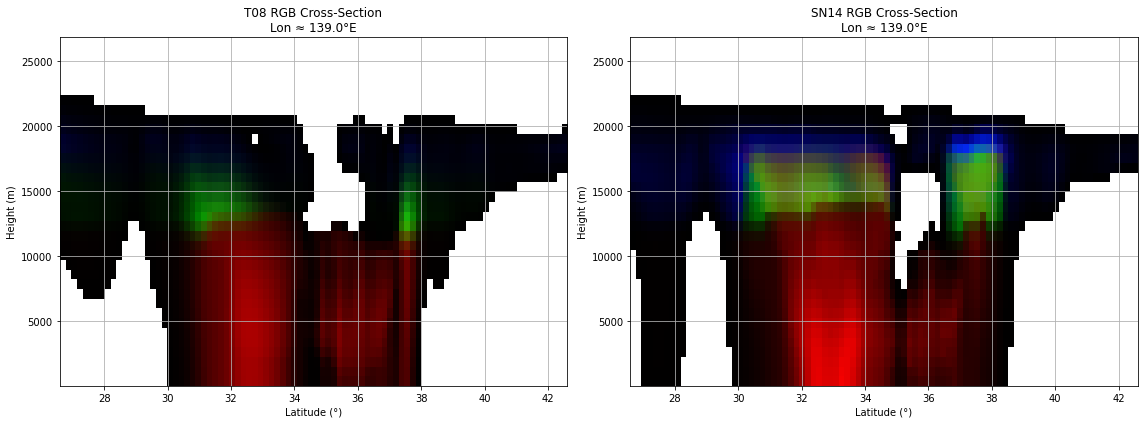

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Copy and process (without breaking the original array)
rgb_t_display = rgb_t[t_val, :, :, x_idx].copy()
rgb_s_display = rgb_s[t_val, :, :, x_idx].copy()

# Create masks that total less than 1/256
mask_t = rgb_t_display.sum(axis=2) < (1 / 256)
mask_s = rgb_s_display.sum(axis=2) < (1 / 256)

# Turn the relevant pixel to white ([1, 1, 1])
rgb_t_display[mask_t] = [1.0, 1.0, 1.0]
rgb_s_display[mask_s] = [1.0, 1.0, 1.0]

# 描画
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# ---------- Left：rgb of T08 ----------
axs[0].imshow(
    rgb_t_display,
    origin='lower',
    aspect='auto',
    extent=[lat[:, x_idx].min(), lat[:, x_idx].max(), zz.min(), zz.max()]
)
axs[0].set_xlabel('Latitude (°)')
axs[0].set_ylabel('Height (m)')
axs[0].set_title(f'T08 RGB Cross-Section\nLon ≈ {target_lon:.1f}°E')
axs[0].grid(True)

# ---------- Right：rgb of SN14 ----------
axs[1].imshow(
    rgb_s_display,
    origin='lower',
    aspect='auto',
    extent=[lat[:, x_idx].min(), lat[:, x_idx].max(), zz.min(), zz.max()]
)
axs[1].set_xlabel('Latitude (°)')
axs[1].set_ylabel('Height (m)')
axs[1].set_title(f'SN14 RGB Cross-Section\nLon ≈ {target_lon:.1f}°E')
axs[1].grid(True)

plt.tight_layout()
plt.show()


## The procedure for distributing a variable (here, the number of model grid points) over the RGB hexagram and determining the corresponding Area on the RGB hexagram for each original model grid point.

### If computational speed is a concern, the use of Numba is recommended. </br>
* The computation time using only NumPy: 1340.64 sec
* The computation time using Numba     : 15.29   sec </br>
(data size: 7290000 , RGB hexagram size parameter: 11)


### Using Numba

In [31]:
#from numba import njit, prange
#import numpy as np
#
#@njit(parallel=True)
#def process_loop(dens, cl_normalized, cg_normalized, ci_normalized, t, r, g, b, vertical_range, n_df_values):
#    hex_data_rgb = np.zeros((dens.shape[0], r.shape[0], r.shape[1], vertical_range.shape[0]), dtype=np.float32)
#    fill_value = -9999.0
#    pos_data_rgb = np.full(dens.shape, fill_value, dtype=np.float32)
#
#    r_len = r.shape[0]
#    g_len = r.shape[1]  # assume r, g, b all same shape
#
#    for it in prange(dens.shape[0]):
#        for kz in range(dens.shape[1]):
#            for jy in range(dens.shape[2]):
#                for ix in range(dens.shape[3]):
#                    val_r = cl_normalized[it, kz ,jy, ix]
#                    val_g = cg_normalized[it, kz ,jy, ix]
#                    val_b = ci_normalized[it, kz ,jy, ix]
#                    if max(val_r, val_g, val_b) >= 1/256.0:
#                        tmp_rgb = (r - val_r)**2 + (g - val_g)**2 + (b - val_b)**2
#                        flat_idx = np.argmin(tmp_rgb)
#                        idx0 = flat_idx // g_len
#                        idx1 = flat_idx % g_len
#                        temp_c = t[it,kz,jy,ix] - 273.15
#                        v_index = int(round(temp_c + 60))  # spacing is 1.0
#                        if v_index < 0:
#                            v_index = 0
#                        elif v_index >= vertical_range.shape[0]:
#                            v_index = vertical_range.shape[0] - 1
#
#                        hex_data_rgb[it, idx0, idx1, v_index] += 1
#                        n_tmp = n_df_values[idx0, idx1]
#                        if n_tmp > 0:
#                            pos_data_rgb[it, kz, jy, ix] = n_tmp * 256.0
#    return hex_data_rgb, pos_data_rgb

In [32]:
##initialized position data
#vertical_range = np.linspace(-60, 40, 101)
#hex_data_rgb_t = np.zeros((dens_t.shape[0],r.shape[0], r.shape[1], vertical_range.shape[0]))
#pos_data_rgb_t = np.full_like(dens_t, fill_value, dtype=float)
#
#start_time = time.time()
#
#n_df_values = n_df.values.astype(np.float32)
#hex_data_rgb_t, pos_data_rgb_t = process_loop(dens_t, cl_t_normalized, cg_t_normalized, ci_t_normalized, t_t, r, g, b, vertical_range, n_df_values)
#hex_data_rgb_s, pos_data_rgb_s = process_loop(dens_s, cl_s_normalized, cg_s_normalized, ci_s_normalized, t_s, r, g, b, vertical_range, n_df_values)
#
#end_time = time.time()
#
#elapsed_time = end_time - start_time
#print(f"elapsed time: {elapsed_time:.2f} sec, data size:",dens_t.shape[0]*dens_t.shape[1]*dens_t.shape[2]*dens_t.shape[3],", RGB hexagram size parameter:",k)
#
#print(hex_data_rgb_t.shape)
#print(pos_data_rgb_t.shape)

elapsed time: 15.29 sec, data size: 7290000 , RGB hexagram size parameter: 11
(25, 96, 96, 101)
(25, 36, 90, 90)


### Using only numpy

In [17]:
#initialized position data
vertical_range = np.linspace(-60, 40, 101)
hex_data_rgb_t = np.zeros((dens_t.shape[0],r.shape[0], r.shape[1], vertical_range.shape[0]))
pos_data_rgb_t = np.full_like(dens_t, fill_value, dtype=float)


start_time = time.time()

for it in range(dens_t.shape[0]):
    print('time step:',it+1)
    for kz in range(dens_t.shape[1]):
        for jy in range(dens_t.shape[2]):
            for ix in range(dens_t.shape[3]):
                tmp_data_rgb_t = np.zeros((r.shape[0], r.shape[1]))
                tmp_data_r_t   = np.zeros((r.shape[0], r.shape[1]))+cl_t_normalized[it, kz ,jy, ix]
                tmp_data_g_t   = np.zeros((r.shape[0], r.shape[1]))+cg_t_normalized[it, kz ,jy, ix]
                tmp_data_b_t   = np.zeros((r.shape[0], r.shape[1]))+ci_t_normalized[it, kz ,jy, ix]
                # Calculate the value of the difference in each coordinate of the RGB hexagram
                tmp_data_rgb_t = (r-tmp_data_r_t)**2.0 + (g-tmp_data_g_t)**2.0 + (b-tmp_data_b_t)**2.0
                # Get the index (coordinates) of the minimum value
                if(cl_t_normalized[it, kz ,jy, ix] >= 1/256.0  or cg_t_normalized[it, kz ,jy, ix] >= 1/256.0 or ci_t_normalized[it, kz ,jy, ix] >= 1/256.0):
                    min_index_t = np.unravel_index(np.argmin(tmp_data_rgb_t), tmp_data_rgb_t.shape)
                    v_index_t = np.argmin(np.abs(vertical_range - (t_t[it,kz,jy,ix]-273.15)))
                    
                    # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
                    hex_data_rgb_t[it,min_index_t[0],min_index_t[1],v_index_t] += 1
                    
                    n_tmp = n_df.iloc[min_index_t[0], min_index_t[1]]
                    if n_tmp > 0:
                        pos_data_rgb_t[it,kz,jy,ix] = n_tmp*256.0
                    #    print(n_tmp*256.0)
                

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",dens_t.shape[0]*dens_t.shape[1]*dens_t.shape[2]*dens_t.shape[3],", RGB hexagram size parameter:",k)

print(hex_data_rgb_t.shape)
print(pos_data_rgb_t.shape)

time step: 1
time step: 2
time step: 3
time step: 4
time step: 5
time step: 6
time step: 7
time step: 8
time step: 9
time step: 10
time step: 11
time step: 12
time step: 13
time step: 14
time step: 15
time step: 16
time step: 17
time step: 18
time step: 19
time step: 20
time step: 21
time step: 22
time step: 23
time step: 24
time step: 25
elapsed time: 672.07 sec, data size: 7290000 , RGB hexagram size parameter: 11
(25, 96, 96, 101)
(25, 36, 90, 90)


In [18]:
#initialized position data
vertical_range = np.linspace(-60, 40, 101)
hex_data_rgb_s = np.zeros((dens_s.shape[0],r.shape[0], r.shape[1], vertical_range.shape[0]))
pos_data_rgb_s = np.full_like(dens_s, fill_value, dtype=float)


start_time = time.time()

for it in range(dens_s.shape[0]):
    print('time step:',it+1)
    for kz in range(dens_s.shape[1]):
        for jy in range(dens_s.shape[2]):
            for ix in range(dens_s.shape[3]):
                tmp_data_rgb_s = np.zeros((r.shape[0], r.shape[1]))
                tmp_data_r_s   = np.zeros((r.shape[0], r.shape[1]))+cl_s_normalized[it, kz ,jy, ix]
                tmp_data_g_s   = np.zeros((r.shape[0], r.shape[1]))+cg_s_normalized[it, kz ,jy, ix]
                tmp_data_b_s   = np.zeros((r.shape[0], r.shape[1]))+ci_s_normalized[it, kz ,jy, ix]
                # Calculate the value of the difference in each coordinate of the RGB hexagram
                tmp_data_rgb_s = (r-tmp_data_r_s)**2.0 + (g-tmp_data_g_s)**2.0 + (b-tmp_data_b_s)**2.0
                # Get the index (coordinates) of the minimum value
                if(cl_s_normalized[it, kz ,jy, ix] >= 1/256.0  or cg_s_normalized[it, kz ,jy, ix] >= 1/256.0 or ci_s_normalized[it, kz ,jy, ix] >= 1/256.0):
                    min_index_s = np.unravel_index(np.argmin(tmp_data_rgb_s), tmp_data_rgb_s.shape)
                    v_index_s = np.argmin(np.abs(vertical_range - (t_s[it,kz,jy,ix]-273.15)))
                    
                    # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
                    hex_data_rgb_s[it,min_index_s[0],min_index_s[1],v_index_s] += 1
                    
                    n_tmp = n_df.iloc[min_index_s[0], min_index_s[1]]
                    if n_tmp > 0:
                        pos_data_rgb_s[it,kz,jy,ix] = n_tmp*256.0
                    #    print(n_tmp*256.0)
                

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",dens_s.shape[0]*dens_s.shape[1]*dens_s.shape[2]*dens_s.shape[3],", RGB hexagram size parameter:",k)

print(hex_data_rgb_s.shape)
print(pos_data_rgb_s.shape)

time step: 1
time step: 2
time step: 3
time step: 4
time step: 5
time step: 6
time step: 7
time step: 8
time step: 9
time step: 10
time step: 11
time step: 12
time step: 13
time step: 14
time step: 15
time step: 16
time step: 17
time step: 18
time step: 19
time step: 20
time step: 21
time step: 22
time step: 23
time step: 24
time step: 25
elapsed time: 668.57 sec, data size: 7290000 , RGB hexagram size parameter: 11
(25, 96, 96, 101)
(25, 36, 90, 90)


## The variable distribution on the RGB hexagram (vertically and time integrated)

(96, 96)
113606.0
(96, 96)
141416.0


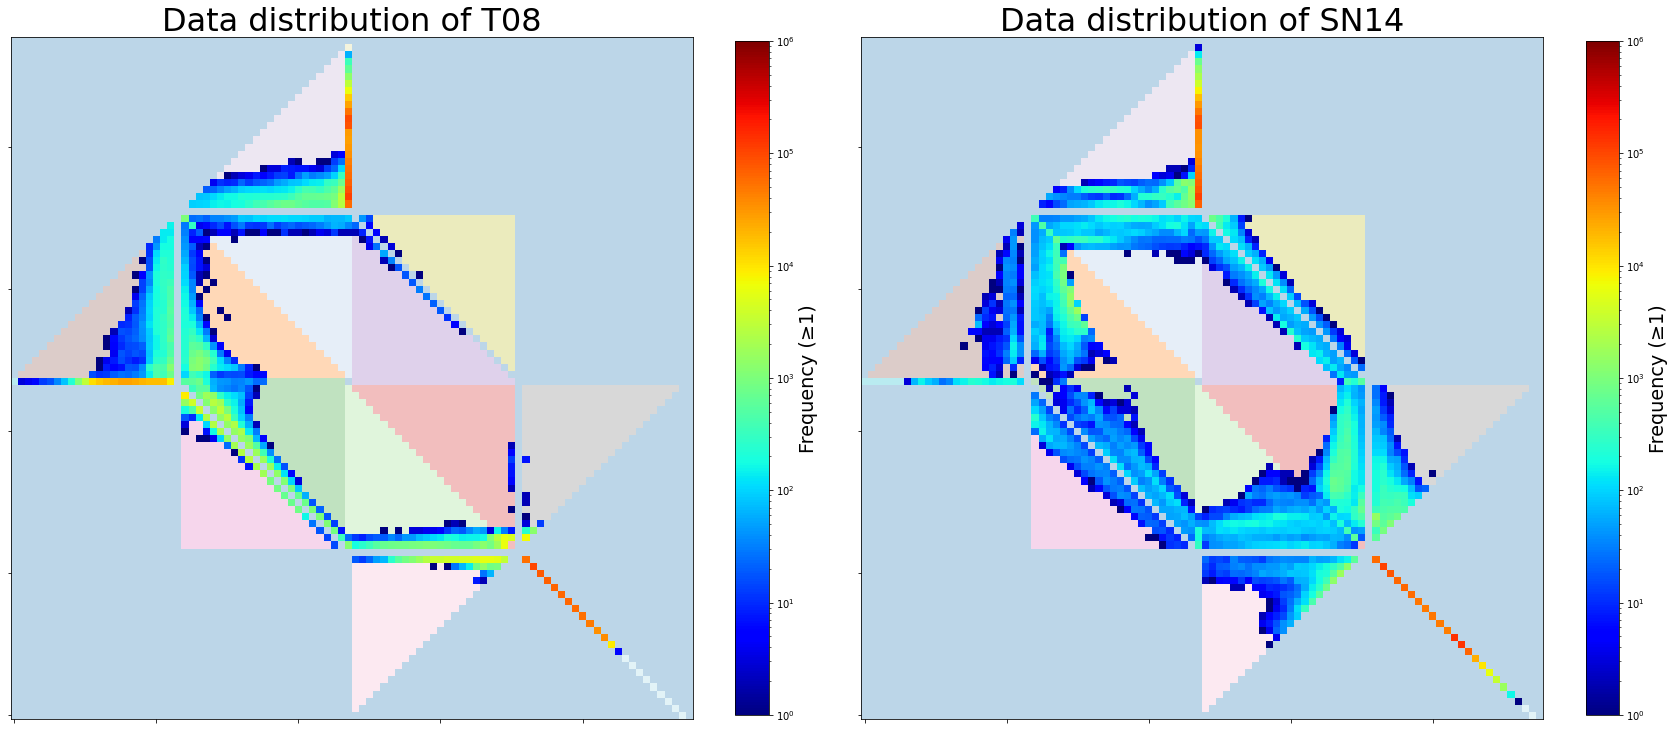

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Sum along the time axis (axis=0) and height axis (axis=1) → shape: (96, 96)
sum_xy_t = np.sum(hex_data_rgb_t, axis=(0, 3))
print(sum_xy_t.shape)
print(np.max(sum_xy_t))

sum_xy_s = np.sum(hex_data_rgb_s, axis=(0, 3))
print(sum_xy_s.shape)
print(np.max(sum_xy_s))

# Masks areas with a value less than 1 to exclude them from visualization
masked_data_t = np.ma.masked_less(sum_xy_t, 1)
masked_data_s = np.ma.masked_less(sum_xy_s, 1)

# Plotting setup
fig, axs = plt.subplots(1, 2, figsize=(24, 12))
fsiz = 32

# Plotting masked_data_t
im_bg_t = axs[0].imshow(n_df, cmap='tab20', origin='lower', alpha=0.3)
im_t = axs[0].imshow(masked_data_t, cmap='jet', origin='lower', norm=LogNorm(vmin=1, vmax=1e+6))
cbar_t = plt.colorbar(im_t, ax=axs[0], shrink=0.8)
cbar_t.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)
axs[0].set_title('Data distribution of T08', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# Plotting masked_data_s
im_bg_s = axs[1].imshow(n_df, cmap='tab20', origin='lower', alpha=0.3)
im_s = axs[1].imshow(masked_data_s, cmap='jet', origin='lower', norm=LogNorm(vmin=1, vmax=1e+6))
cbar_s = plt.colorbar(im_s, ax=axs[1], shrink=0.8)
cbar_s.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)
axs[1].set_title('Data distribution of SN14', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.tight_layout()
plt.show()


## Distribution of each Area on the RGB hexagram at an altitude

### Horizontal Areas distribution with temperature

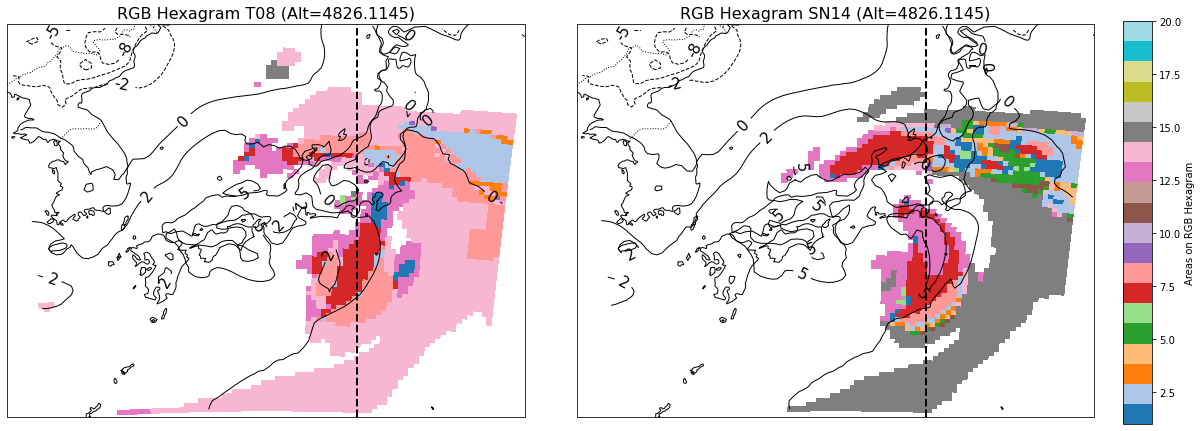

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Plotting parameters
t_val = 20
z_val = 16

# Create Figure and two map axes (side by side)
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- Left：pos_data_rgb of T08 ----------
cf_t = axs[0].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_t[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)
contours_t = axs[0].contour(
    lon, lat,
    t_t[t_val, z_val, :, :] - 273.15,
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[0].clabel(contours_t, inline=True, fontsize=15, fmt='%1.0f')
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, linestyle=':')
axs[0].set_title(f"RGB Hexagram T08 (Alt={zz[z_val]})", fontsize=16)

# ---------- Right：pos_data_rgb of SN14 ----------
cf_s = axs[1].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_s[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)
contours_s = axs[1].contour(
    lon, lat,
    t_s[t_val, z_val, :, :] - 273.15,
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[1].clabel(contours_s, inline=True, fontsize=15, fmt='%1.0f')
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, linestyle=':')
axs[1].set_title(f"RGB Hexagram SN14 (Alt={zz[z_val]})", fontsize=16)

# plt adjustment
fig.subplots_adjust(right=0.88, wspace=0.1)

# Colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(cf_s, cax=cbar_ax)
cbar.set_label('Areas on RGB Hexagram')

for ax in axs:
    ax.plot(
        [139, 139],                         
        [lat.min(), lat.max()],             
        linestyle='--', color='black', linewidth=2,
        transform=ccrs.PlateCarree()        
    )

plt.show()


### Horizontal Areas distribution with total hydrometeor

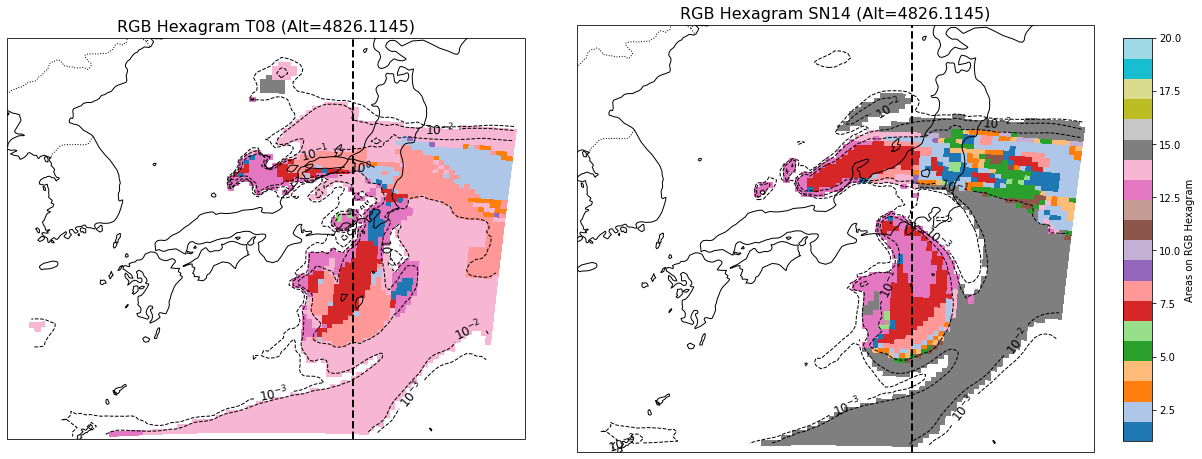

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Plotting parameter
t_val = 20
z_val = 16

# Create Figure and two map axes (side by side)
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- Left：pos_data_rgb of T08 ----------
cf_t = axs[0].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_t[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)

# Log scale（qhyd_t）
qhyd_t_gkg = qhyd_t[t_val, z_val, :, :] * 1000.0  # g/kg
qhyd_t_log = np.ma.masked_less_equal(qhyd_t_gkg, 0.0)
contours_t = axs[0].contour(
    lon, lat,
    np.log10(qhyd_t_log),
    levels=np.arange(-3, 1, 1),  # 10^-3 ～ 10^0 [g/kg]
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[0].clabel(
    contours_t, inline=True, fontsize=12,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, linestyle=':')
axs[0].set_title(f"RGB Hexagram T08 (Alt={zz[z_val]})", fontsize=16)

# ---------- Right：pos_data_rgb of SN14 ----------
cf_s = axs[1].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_s[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)

# Log scale（qhyd_s）
qhyd_s_gkg = qhyd_s[t_val, z_val, :, :] * 1000.0
qhyd_s_log = np.ma.masked_less_equal(qhyd_s_gkg, 0.0)
contours_s = axs[1].contour(
    lon, lat,
    np.log10(qhyd_s_log),
    levels=np.arange(-3, 1, 1),
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[1].clabel(
    contours_s, inline=True, fontsize=12,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, linestyle=':')
axs[1].set_title(f"RGB Hexagram SN14 (Alt={zz[z_val]})", fontsize=16)

# adjusting subplots
fig.subplots_adjust(right=0.88, wspace=0.1)

# Colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(cf_s, cax=cbar_ax)
cbar.set_label('Areas on RGB Hexagram')

# Add longitude line
for ax in axs:
    ax.plot(
        [139, 139],
        [lat.min(), lat.max()],
        linestyle='--', color='black', linewidth=2,
        transform=ccrs.PlateCarree()
    )

plt.show()


### Vertical Areas distribution with temperature

  # This is added back by InteractiveShellApp.init_path()


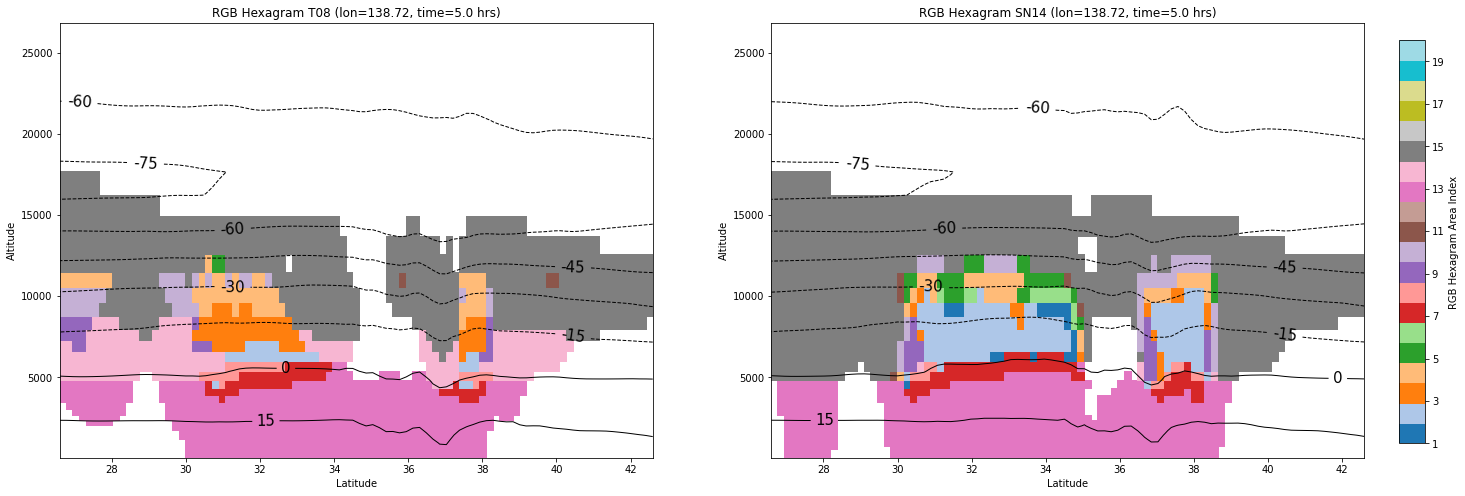

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create Figure and two map axes (side by side)
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# ---------- Left：pos_data_rgb of T08 ----------
pcm_t = axs[0].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_t[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)
contours_t = axs[0].contour(
    lat[:, x_idx], zz,
    t_t[t_val, :, :, x_idx] - 273.15,
    colors='black', linewidths=1
)
axs[0].clabel(contours_t, inline=True, fontsize=15, fmt='%1.0f')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Altitude')
axs[0].set_title(f'RGB Hexagram T08 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# ---------- Right：pos_data_rgb of SN14 ----------
pcm_b = axs[1].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_s[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)
contours_s = axs[1].contour(
    lat[:, x_idx], zz,
    t_s[t_val, :, :, x_idx] - 273.15,
    colors='black', linewidths=1
)
axs[1].clabel(contours_s, inline=True, fontsize=15, fmt='%1.0f')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Altitude')
axs[1].set_title(f'RGB Hexagram SN14 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# adjusting subplot
fig.subplots_adjust(right=0.88, wspace=0.2)

# colorbar（[left, bottom, width, height]）
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(pcm_t, cax=cbar_ax)
cbar.set_label('RGB Hexagram Area Index')
cbar.set_ticks(np.arange(1, 21, 2))

plt.show()


### Vertical Areas distribution with total hydrometeor

  # This is added back by InteractiveShellApp.init_path()


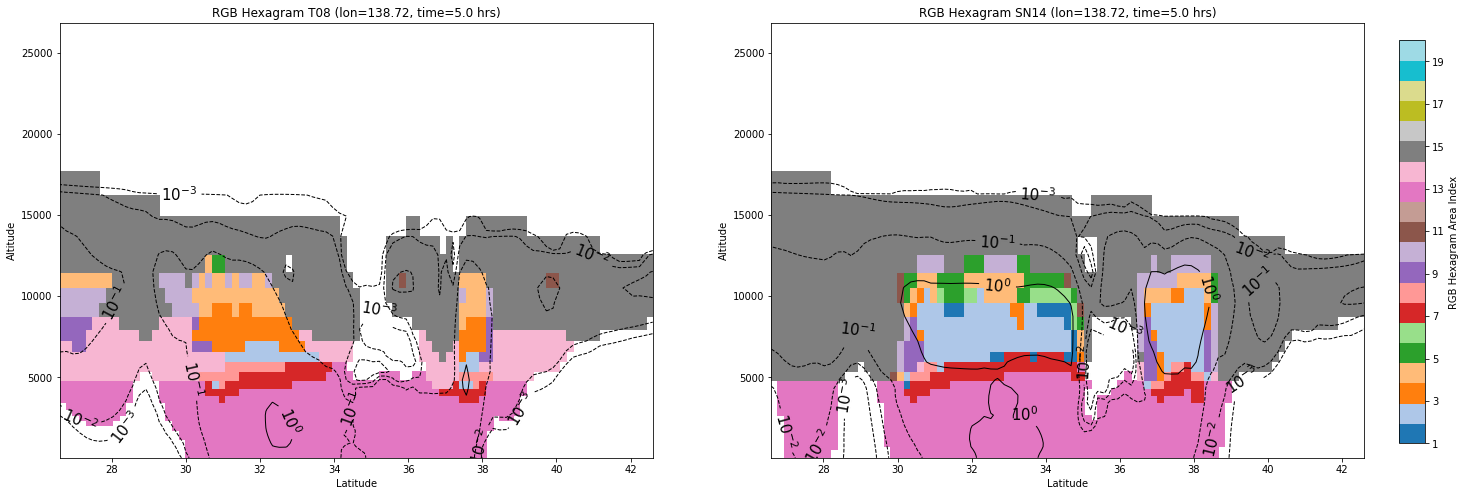

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create Figure and two map axes (side by side)
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# ---------- Left：pos_data_rgb of T08 ----------
pcm_t = axs[0].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_t[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)

# Log scale qhyd
qhyd_t_gkg = qhyd_t[t_val, :, :, x_idx] * 1000.0
qhyd_t_log = np.ma.masked_less_equal(qhyd_t_gkg, 0.0)
contours_t = axs[0].contour(
    lat[:, x_idx], zz,
    np.log10(qhyd_t_log),
    levels=np.arange(-3, 1, 1),  # 10^-3 ～ 10^0
    colors='black', linewidths=1
)
axs[0].clabel(
    contours_t, inline=True, fontsize=15,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Altitude')
axs[0].set_title(f'RGB Hexagram T08 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# ---------- Right：pos_data_rgb of SN14 ----------
pcm_b = axs[1].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_s[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)

# Log scale qhyd
qhyd_s_gkg = qhyd_s[t_val, :, :, x_idx] * 1000.0
qhyd_s_log = np.ma.masked_less_equal(qhyd_s_gkg, 0.0)
contours_s = axs[1].contour(
    lat[:, x_idx], zz,
    np.log10(qhyd_s_log),
    levels=np.arange(-3, 1, 1),
    colors='black', linewidths=1
)
axs[1].clabel(
    contours_s, inline=True, fontsize=15,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Altitude')
axs[1].set_title(f'RGB Hexagram SN14 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# adjusting subplot
fig.subplots_adjust(right=0.88, wspace=0.2)

# Colorbar（[left, bottom, width, height]）
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(pcm_t, cax=cbar_ax)
cbar.set_label('RGB Hexagram Area Index')
cbar.set_ticks(np.arange(1, 21, 2))

plt.show()


# Percentage of data in each Area of the RGB hexagram

In [26]:
# sum of pos_data_rgb
total_sum_rgb = np.sum(hex_data_rgb_t)
tz_sum_rgb = np.sum(hex_data_rgb_t, axis=(0,3))

sum_xy_list = []  # Store each sum of n_df = 1 to 15
    
for i in range(1, 16):
    mask = (n_df * 256.0 == i)
    indices = np.where(mask)
    sum_xy = np.sum(tz_sum_rgb[indices])    # Sum of Areas that match each n_df value
    sum_xy_list.append(sum_xy_t)
    print("T08 percentage of Area", i, ": ", f"{100.0 * sum_xy / total_sum_rgb:.3f}", "%")
print(sum_xy)

T08 percentage of Area 1 :  0.109 %
T08 percentage of Area 2 :  0.897 %
T08 percentage of Area 3 :  2.527 %
T08 percentage of Area 4 :  1.437 %
T08 percentage of Area 5 :  0.512 %
T08 percentage of Area 6 :  0.016 %
T08 percentage of Area 7 :  1.395 %
T08 percentage of Area 8 :  1.020 %
T08 percentage of Area 9 :  2.041 %
T08 percentage of Area 10 :  2.907 %
T08 percentage of Area 11 :  0.412 %
T08 percentage of Area 12 :  0.004 %
T08 percentage of Area 13 :  41.735 %
T08 percentage of Area 14 :  10.783 %
T08 percentage of Area 15 :  34.205 %
728355.0


In [27]:
# sum of pos_data_rgb
total_sum_rgb = np.sum(hex_data_rgb_s)
tz_sum_rgb = np.sum(hex_data_rgb_s, axis=(0,3))

sum_xy_list = []  # Store each sum of n_df = 1 to 15
    
for i in range(1, 16):
    mask = (n_df * 256.0 == i)
    indices = np.where(mask)
    sum_xy = np.sum(tz_sum_rgb[indices])    # Sum of Areas that match each n_df value
    sum_xy_list.append(sum_xy)
    print("SN14 percentage of Area", i, ": ", f"{100.0 * sum_xy / total_sum_rgb:.3f}", "%")
print(sum_xy)

SN14 percentage of Area 1 :  0.460 %
SN14 percentage of Area 2 :  1.218 %
SN14 percentage of Area 3 :  0.247 %
SN14 percentage of Area 4 :  0.520 %
SN14 percentage of Area 5 :  1.285 %
SN14 percentage of Area 6 :  0.380 %
SN14 percentage of Area 7 :  0.843 %
SN14 percentage of Area 8 :  0.093 %
SN14 percentage of Area 9 :  0.163 %
SN14 percentage of Area 10 :  0.665 %
SN14 percentage of Area 11 :  0.890 %
SN14 percentage of Area 12 :  0.212 %
SN14 percentage of Area 13 :  43.000 %
SN14 percentage of Area 14 :  0.102 %
SN14 percentage of Area 15 :  49.923 %
1052100.0


## time-temperature plots of each Area

(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)


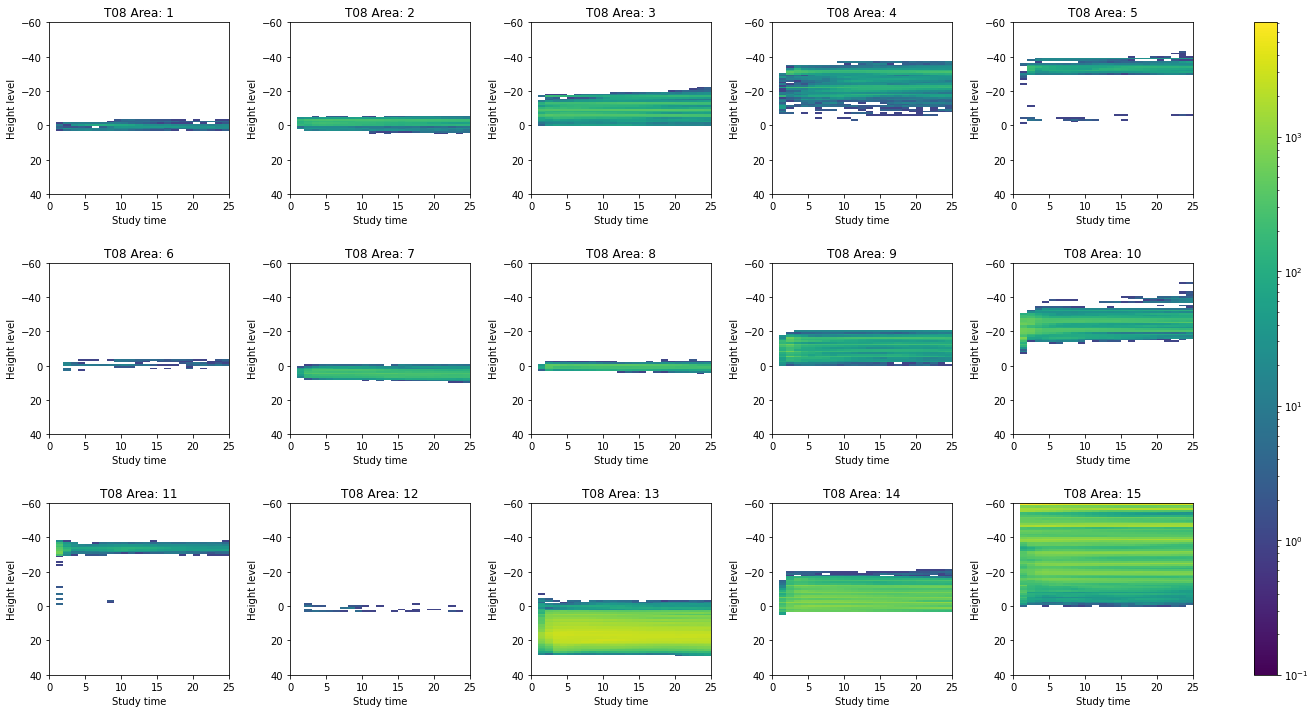

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# Custom colormap (displaying 0 or less as white)
base_cmap = plt.get_cmap('viridis')
cmap = mcolors.ListedColormap(base_cmap(np.linspace(0, 1, 256)))
cmap.set_under('white')  # Applies to values less than vmin

# Figure setup
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(3, 6, width_ratios=[1,1,1,1,1,1/8], wspace=0.4, hspace=0.4)

axes = []
for i in range(15):
    row = i // 5
    col = i % 5
    ax = fig.add_subplot(gs[row, col])
    axes.append(ax)

# Determine the maximum value for all areas (for color scale unification)
global_max = 0
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))  # pandas.DataFrame
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:
                masked_data_list.append(hex_data_rgb_t[:, iy, ix, :])
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)
        hist_data = np.sum(masked_data, axis=1)
        current_max = np.max(hist_data)
        if current_max > global_max:
            global_max = current_max

# Plotting on each subplot
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:
                masked_data_list.append(hex_data_rgb_t[:, iy, ix, :])
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)
        hist_data = np.sum(masked_data, axis=1)
    else:
        hist_data = np.zeros((7, 101))  # Dummy in case of no data

    print(hist_data.shape)
    ax = axes[i_area]
    im = ax.imshow(hist_data.T, aspect='auto', origin='upper',
                   extent=[0, 25, 40, -60], cmap=cmap,
                   norm=LogNorm(vmin=0.1, vmax=global_max), interpolation='none')

    ax.set_xlabel('Study time')
    ax.set_ylabel('Height level')
    ax.set_title('T08 Area: ' + str(i_area + 1))
    ax.grid(False)

# Add colorbar
cbar_ax = fig.add_subplot(gs[:, 5])
fig.colorbar(im, cax=cbar_ax)

plt.show()


(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)


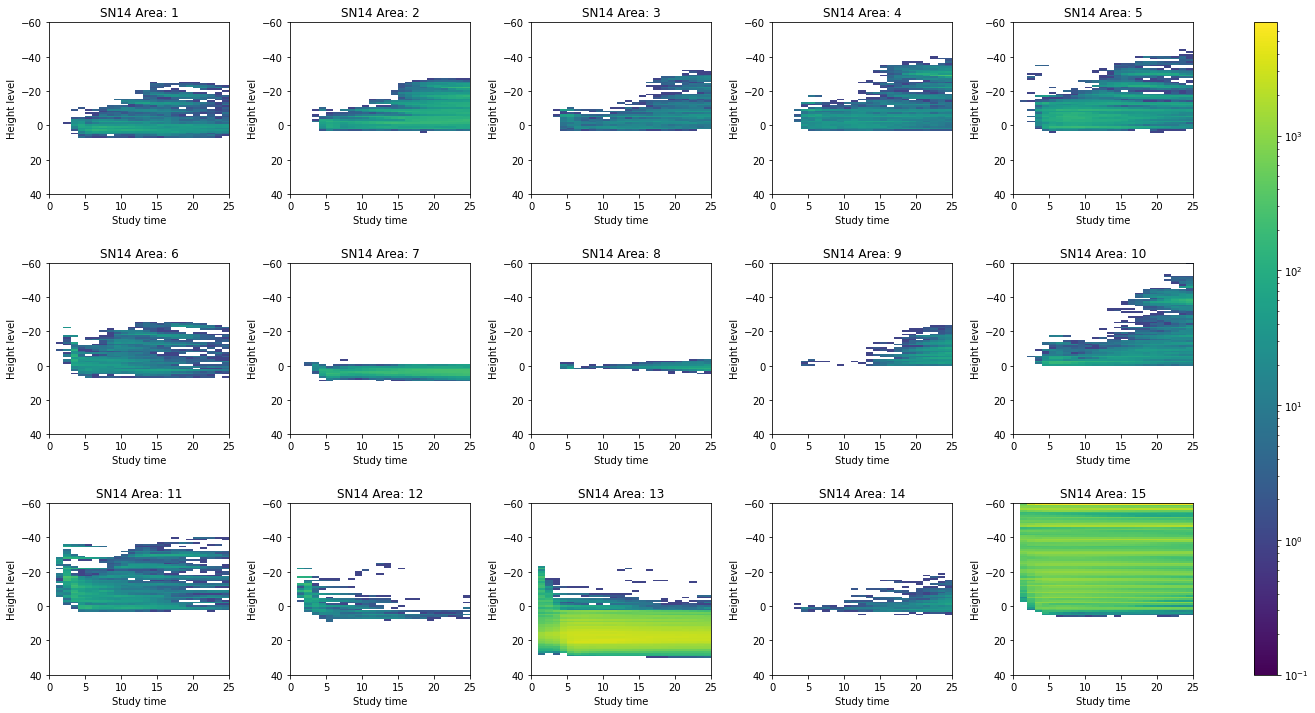

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# Custom colormap (displaying 0 or less as white)
base_cmap = plt.get_cmap('viridis')
cmap = mcolors.ListedColormap(base_cmap(np.linspace(0, 1, 256)))
cmap.set_under('white')  # Applies to values less than vmin

# Figure setup
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(3, 6, width_ratios=[1,1,1,1,1,1/8], wspace=0.4, hspace=0.4)

axes = []
for i in range(15):
    row = i // 5
    col = i % 5
    ax = fig.add_subplot(gs[row, col])
    axes.append(ax)

# Determine the maximum value for all areas (for color scale unification)
global_max = 0
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))  # pandas.DataFrame
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:
                masked_data_list.append(hex_data_rgb_s[:, iy, ix, :])
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)
        hist_data = np.sum(masked_data, axis=1)
        current_max = np.max(hist_data)
        if current_max > global_max:
            global_max = current_max

# Plotting on each subplot
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:
                masked_data_list.append(hex_data_rgb_s[:, iy, ix, :])
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)
        hist_data = np.sum(masked_data, axis=1)
    else:
        hist_data = np.zeros((7, 101))  # Dummy in case of no data

    print(hist_data.shape)
    ax = axes[i_area]
    im = ax.imshow(hist_data.T, aspect='auto', origin='upper',
                   extent=[0, 25, 40, -60], cmap=cmap,
                   norm=LogNorm(vmin=0.1, vmax=global_max), interpolation='none')

    ax.set_xlabel('Study time')
    ax.set_ylabel('Height level')
    ax.set_title('SN14 Area: ' + str(i_area + 1))
    ax.grid(False)

# Add colorbar
cbar_ax = fig.add_subplot(gs[:, 5])
fig.colorbar(im, cax=cbar_ax)

plt.show()
